#                                                kNN Algorithm

In [1]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

#Plot
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

#Machine learning
import sklearn
from sklearn.linear_model import LogisticRegression

In [2]:
#import from csv
nyc_sub = pd.read_csv('C:/Users/data/deep/nyc_subway_weather.csv')

In [3]:
df1 = nyc_sub.copy()
#drop rows with NA
df1.dropna(inplace = True)
df1.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

In [5]:
nyc_data = df1[['fog','precipi','pressurei','rain','tempi','wspdi']]
nyc_target = df1[['conds']]
nyc_complete = pd.concat([nyc_data,nyc_target],axis=1)
nyc_complete.head()

,fog,precipi,pressurei,rain,tempi,wspdi,conds
0,0.0,0.0,30.22,0.0,55.9,3.5,Clear
1,0.0,0.0,30.25,0.0,52.0,3.5,Partly Cloudy
2,0.0,0.0,30.28,0.0,62.1,6.9,Mostly Cloudy
3,0.0,0.0,30.26,0.0,57.9,15.0,Mostly Cloudy
4,0.0,0.0,30.28,0.0,52.0,10.4,Mostly Cloudy


# Visualizing pairwise relationships in a dataset

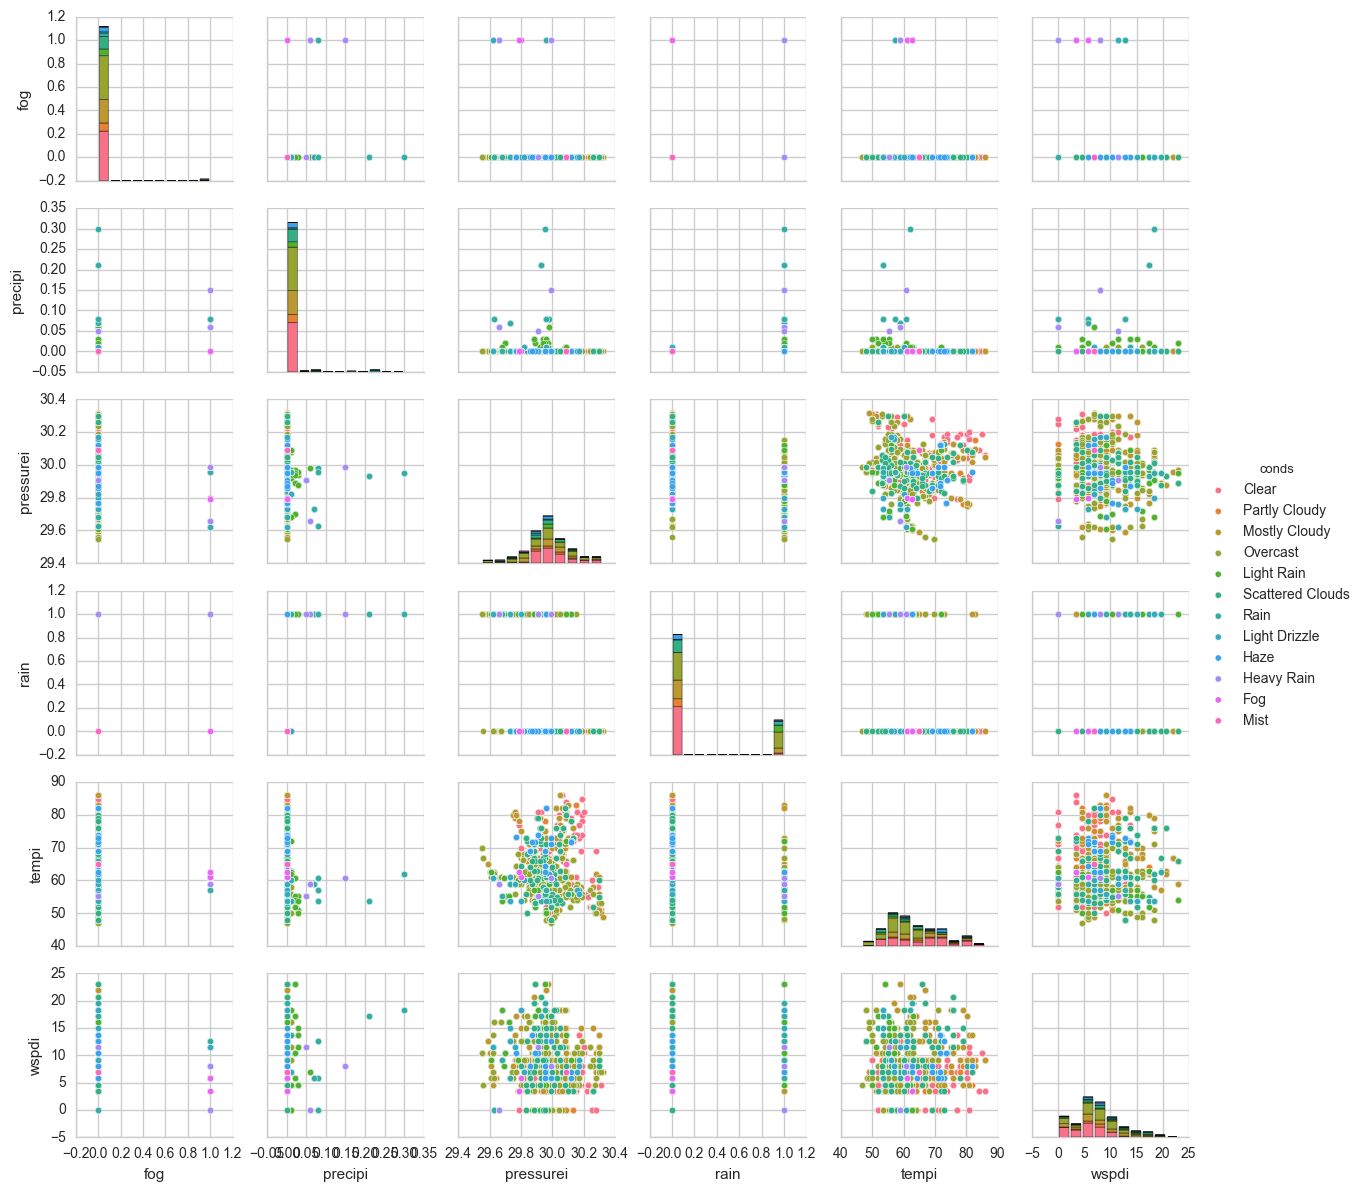

In [6]:
sns.pairplot(nyc_complete,hue='conds',size=2)

In [7]:
X = nyc_data
Y = nyc_target
Y = np.ravel(Y)
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 3)

# K nearest neighbour

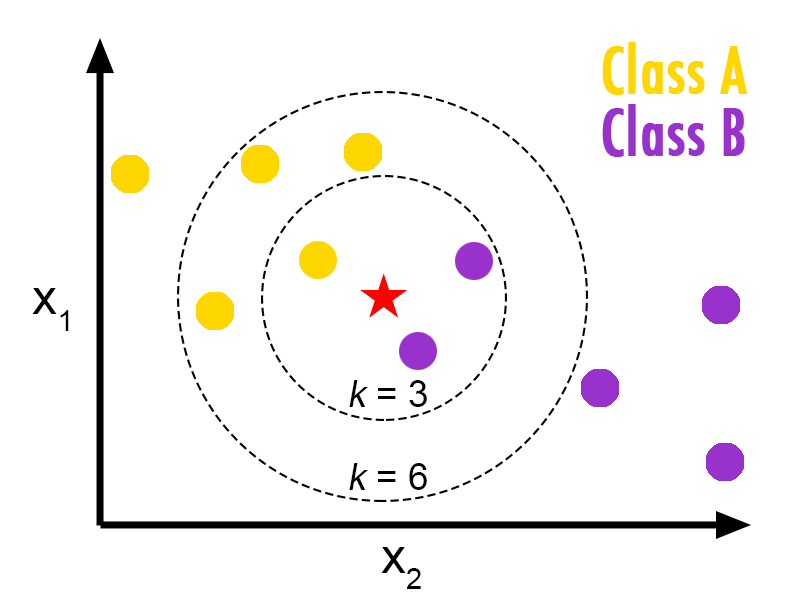

In [15]:
from IPython.display import Image
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

Imagine we have two Classes in our training set, A and B. Then we have to classify a new data point in our testing data, we represent this as a red star. Now we just expand a specific distance away from our feature space until we hit k number of other data points. In the figure above you can see the differences between various k values. An important thing to note, for a binary classification using this method, we must choose an odd number for k, to avoid the case of a "tied" distance between two classes.

In [16]:
#Import from SciKit Learn
from sklearn.neighbors import KNeighborsClassifier

# We'll first start with k=6

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print(metrics.accuracy_score(Y_test,Y_pred))

0.996951934349


The accuracy is 99 which shows that model is flawed, because of the inputs, because of the input. This should be avoided by incresing the nummber k.

In [17]:
# We will use k=100

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 100)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print(metrics.accuracy_score(Y_test,Y_pred))

0.893083235639


The accuracy decrease as the k increases. This shows us that kNN is not a best fit for this evaluation

# Using K range Object

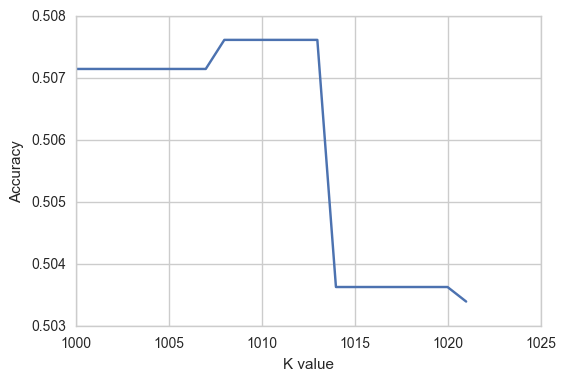

In [19]:
K_range = range(1000,1022)
accuracy = []
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

plt.plot(K_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')

The plot shows us that the accuracy decreases.

# Scaling, normalization
Scaling in statistics usually means a linear transformation of the form f(x)=ax+bf(x)=ax+b.

Normalizing can either mean applying a transformation so that your transformed data is roughly normally distributed, but it can also simply mean putting different variables on a common scale. Standardizing, which means subtracting the mean and dividing by the standard deviation, is an example of the later usage. As you may see it's also an example of scaling. An example for the first would be taking the log for lognormal distributed data.

In [21]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

# View the dataframe
df_normalized.head()
df_normalized.columns = ['fog','precipi','pressurei','rain','tempi','wspdi']
df_normalized.head()

,fog,precipi,pressurei,rain,tempi,wspdi
0,0.0,0.0,0.870130,0.0,0.230179,0.152174
1,0.0,0.0,0.909091,0.0,0.130435,0.152174
2,0.0,0.0,0.948052,0.0,0.388747,0.300000
3,0.0,0.0,0.922078,0.0,0.281330,0.652174
4,0.0,0.0,0.948052,0.0,0.130435,0.452174


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(df_normalized,Y)
# We'll first start with k=1000
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 1000)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

print("KfoldCrossVal mean score using KNN is %s" %cross_val_score(knn,X,Y,cv=10).mean())

# Check Accuracy against the Testing Set
print(metrics.accuracy_score(Y_test,Y_pred))

KfoldCrossVal mean score using KNN is 0.49736570781
0.507315700619


Normalising and Scaling over here has no effects. It better to leave them denormalised.

# Conclusion:

        1.How well does the kNN classifier perform?
        The kNN provides a performance(accuracy) of 50 percent for k of 1000
        
        2.Does the k for kNN make a difference? Try for a range of values of k?
        As k increases the accuracy decreases. For a k value of 3 we had a accuracy of 99 percent but as it was moved to1000 
        it provided only 50 percent.
        
        3.Does scaling, normalization or leaving the data unscaled make a difference for kNN?
        Normalising and Scaling over here has no effects. It better to leave them denormalised.
        

 --------------------------------------------------------------------------------------------------------------------------

   # Decision Trees and Random Forest

In [8]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

#Plot
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

#Machine learning
import sklearn


#Evaluating ML results
from sklearn import metrics


#new

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn import tree
import os
from sklearn import tree as tr
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.tree import export_graphviz


In [9]:
selectedColumns = df1.loc[:,'conds':'wspdi']
# create design matrix X and target vector y
X = np.array(selectedColumns.loc[:, 'fog':'wspdi']) 	# end index is exclusive
y = np.array(selectedColumns['conds']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

def decisionTreeGeneration(criterion, X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion = criterion, random_state = 100,
                               max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [10]:
criterion = 'gini'
treeOutput = decisionTreeGeneration(criterion,X_train, y_train)
y_pred = treeOutput.predict(X_test)
y_pred

array(['Overcast', 'Light Rain', 'Clear', ..., 'Overcast', 'Mostly Cloudy',
       'Clear'], dtype=object)

In [11]:
# evaluate accuracy
print (accuracy_score(y_test, y_pred)*100,'%')

49.8710433763 %


## Decision Tree Visualization

In [12]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.
    """
    with open("dt.dot", 'w') as f:
        tr.export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [13]:
features = ['fog', 'precipi', 'pressurei', 'rain', 'tempi', 'wspdi']
visualize_tree(treeOutput, features)

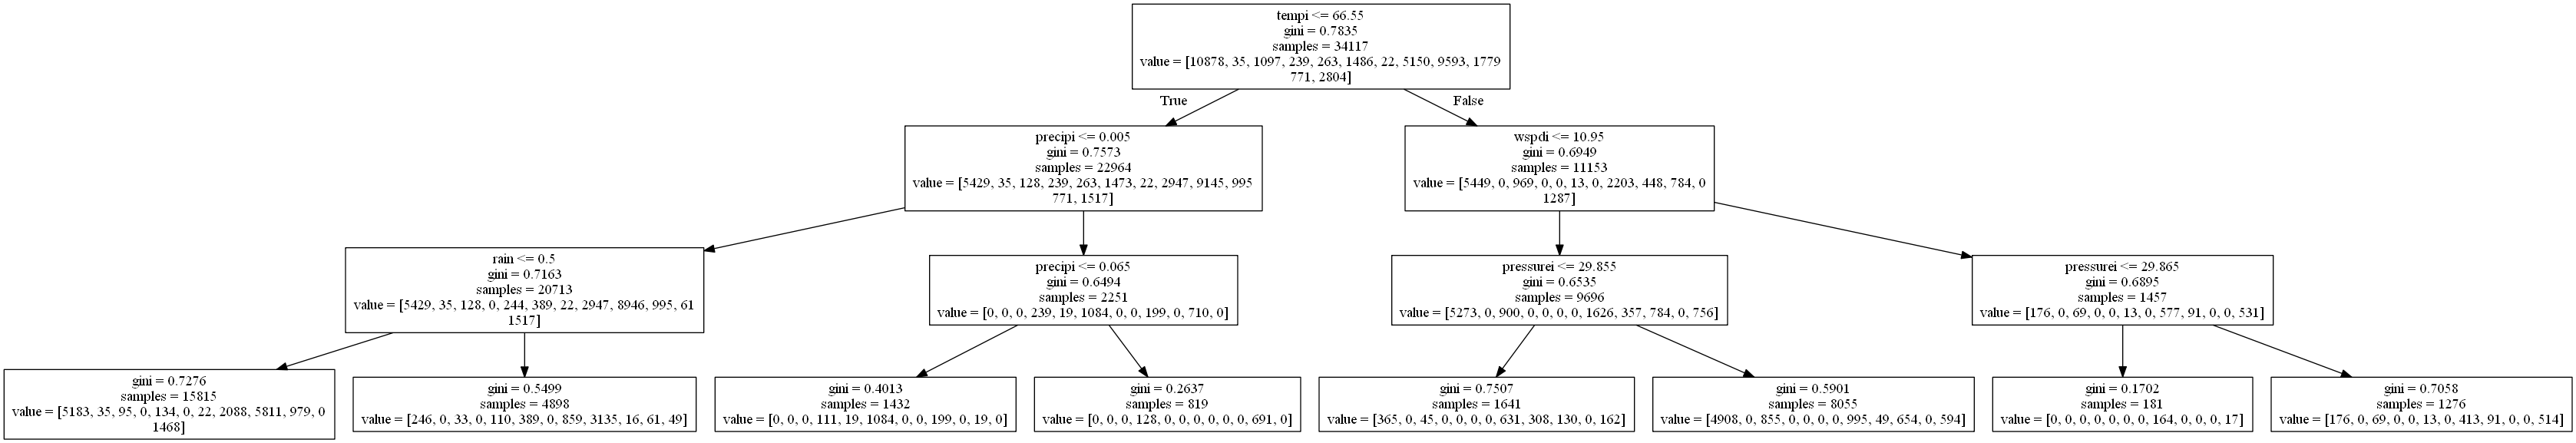

In [14]:
rootPath=os.getcwd()
dotFilePath = os.path.join(rootPath,"dt.dot")
#graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
graph = pydotplus.graphviz.graph_from_dot_file(dotFilePath)
# make sure you have graphviz installed and set in path
Image(graph.create_png())

# Feature Selection in Python with Scikit-Learn

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [48]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# create a base classifier used to evaluate a subset of attributes
model = DecisionTreeClassifier()

# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, Y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True]
[4 2 1 3 1 1]


From the above we could conclude that pressure, temperature and wspdi are the best feature for this 

Methods that use ensembles of decision trees (like Random Forest or Extra Trees) can also compute the relative importance of each attribute. These importance values can be used to inform a feature selection process.

In [49]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X,Y)

# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.00881497  0.05777882  0.34048888  0.04899683  0.32846248  0.21545802]


In [50]:
nyc_data = df1[['pressurei','tempi','wspdi']]
X = nyc_data
X.head()

,pressurei,tempi,wspdi
0,30.22,55.9,3.5
1,30.25,52.0,3.5
2,30.28,62.1,6.9
3,30.26,57.9,15.0
4,30.28,52.0,10.4


In [51]:
Y = np.ravel(Y)
Y
#dividing data to have a training and a testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.4,random_state=10)


In [52]:
# Decision Tree classifier

model1 = DecisionTreeClassifier(max_depth=6,random_state=0)

treeO = model1.fit(X_train,Y_train)

# Decision Tree cross validation

print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(model1,X,Y,cv=10).mean())

predicted = model1.predict(X_test)

print(metrics.accuracy_score(Y_test,predicted))

KfoldCrossVal mean score using Decision Tree is 0.572657119091
0.568321707017


## RANDOM FOREST

In [55]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 3)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,Y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, Y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(Y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.992238683538
Accuracy score using Random Forest is 0.992672489595


# Conclusion:
    1.How well does the decision tree classifier perform?
    The Decision tree model provides an accuracy of 57 with a depth of 6, but increases to 96 percent with increase in depth of 16.
    
    2.Does the size of the data set make a difference?
    The size plays a major role. If the train size is reduced the accuracy reduces from 57 to 56.
    
    3.Do random forests make a difference?
    The randomn forest makes a difference by providing an accuracy of 99 percent.
    
    4.Do the rules make sense? If so why did the algorithm generate good rules? If not, why not?
    The rules of classification makes sense as it is divided based on the gini.
    
    5.Does scaling, normalization or leaving the data unscaled make a difference?
    There exists no huge spike or sets of spike in the data. Hence it is better to leave them denormalised.

-------------------------------------------------------------------------------------------------------------------------------

# NAIVE BAYES ALGORITHM

In [62]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import log
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing

## Distribution of each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DE85E0F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027D80312E80>]], dtype=object)

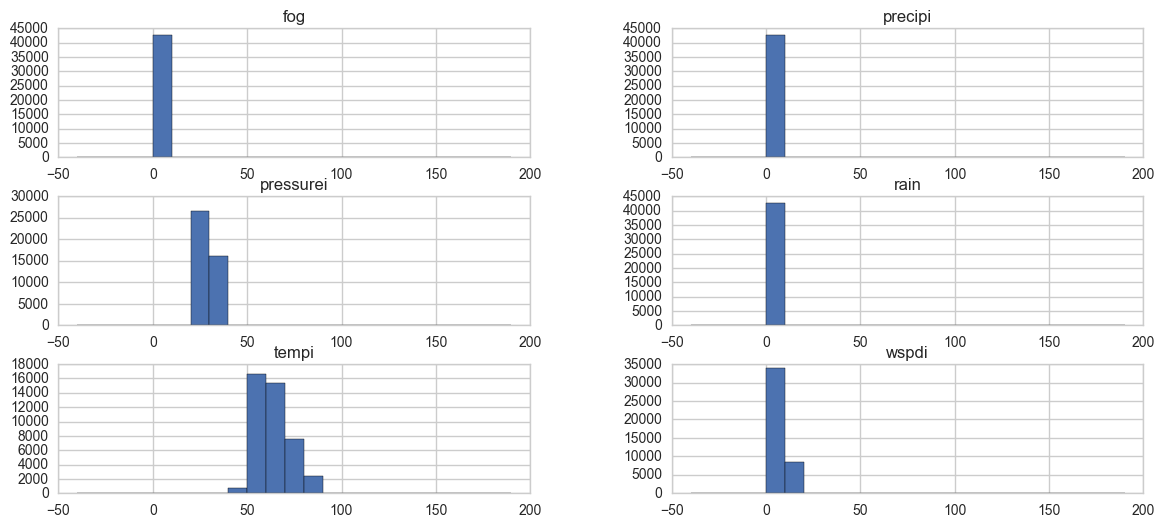

In [63]:
bin_values = np.arange(start=-50, stop=200, step=10)
x = selectedColumns.loc[:,'fog':'wspdi']
x.hist(bins=bin_values, figsize=[14,6])

In [64]:
# loading libraries
import numpy as np
from sklearn.cross_validation import train_test_split

#variable_names = ['fog', 'precipi', 'pressurei', 'rain', 'tempi', 'wspdi']
# create design matrix X and target vector y
X = np.array(selectedColumns.loc[:, 'fog':'wspdi']) 	# end index is exclusive
y = np.array(selectedColumns['conds']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
#pd.DataFrame(pca.components_,columns=variable_names)

## Gaussian Naive Bayes

In [65]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

GaussianNB()

In [66]:
#Predict Output 
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = y_test
print(accuracy_score(expected, predicted)*100, '%')

37.8077373974 %


## Multinominal Naive Bayes

In [67]:
# Creating multinominal classifier
multiModel = MultinomialNB()
multiModel.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
#Predict Output 
prediction = model.predict(X_test)

# Actual Expected Outvomes
expected = y_test
print(accuracy_score(expected, prediction)*100, '%')

37.8077373974 %


Conclusion :
- The performance of Naives Bayes is very low because I my data is not normally distributed  
- Whatever type of naives bayes u consider for my dataset the prediction accuracy is the same so we can use any gaussian naives bayes as my data is continuous

## Bernouli Naive Bayes

In [69]:
# Creating multinominal classifier
bernouliModel = BernoulliNB()
bernouliModel.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [70]:
#Predict Output 
prediction = model.predict(X_test)

# Actual Expected Outvomes
expected = y_test
print(accuracy_score(expected, prediction)*100, '%')

37.8077373974 %


# Scaling and Normalizing data

## Standardization of Data

In [71]:
std_scale = preprocessing.StandardScaler().fit(selectedColumns.loc[:,'fog':'wspdi'])
df_std = std_scale.transform(selectedColumns.loc[:,'fog':'wspdi'])

minmax_scale = preprocessing.MinMaxScaler().fit(selectedColumns.loc[:,'fog':'wspdi'])
df_minmax = minmax_scale.transform(selectedColumns.loc[:,'fog':'wspdi'])

In [72]:
print('Mean after standardization:\nFog={:.2f}, Precipitation={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nFog={:.2f}, Precipitation={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Fog=0.00, Precipitation=-0.00

Standard deviation after standardization:
Fog=1.00, Precipitation=1.00


In [73]:
print('Min-value after min-max scaling:\nFog={:.2f}, Precipitation={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nFog={:.2f}, Precipitation={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Fog=0.00, Precipitation=0.00

Max-value after min-max scaling:
Fog=1.00, Precipitation=1.00


## Feature Scaling - Standardization on training and test

In [74]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## Dimensionality reduction via Principal Component Analysis 

Now, we perform a PCA on the standardized and the non-standardized datasets to transform the dataset onto a 2-dimensional feature subspace.
In a real application, a procedure like cross-validation would be done in order to find out what choice of features would yield a optimal balance between “preserving information” and “overfitting” for different classifiers. However, we will omit this step since we don’t want to train a perfect classifier here, but merely compare the effects of standardization.

In [75]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA().fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)


In [76]:
pca.explained_variance_ratio_

array([  7.76242130e-01,   2.21720378e-01,   1.75278487e-03,
         1.72994840e-04,   1.06031137e-04,   5.68046313e-06])

## Implementing Gausian Naive Bayes on standardized and non- standardized

All the data values of our dataframe are numeric. Now, we need to convert them on a single scale. We can standardize the values.  We can use the below formula for standardization.

x_{i} =  = \frac{{x}_i - mean(x)} {\sigma(x)}

In [78]:
# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

## Evaluating the classification accuracy with and without standardization

In [79]:
pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
41.63%

Prediction accuracy for the test dataset
41.06%



In [80]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
43.20%

Prediction accuracy for the test dataset
42.94%



Conclusion: 
- How well does the naive Bayes classifier perform?
        Its performance is not that good as the data is very continuous
- Which form of Naive Bayes did you use (Bernoulli, Multinomial or Gaussian)? Why?
        Bernouli is condidered to be a best algorithm as the value is not normally distributed
- Does scaling, normalization or leaving the data unscaled make a difference for Naive Bayes?
        The scaling and normalization doesnt have much effect on the accuracy of model
        But when PCA is performed and the Gaussian is implemented on the train and test the accuracy is increased by few percent

--------------------------------------------------------------------------------------------------------------------------------

# Support Vector Machines

Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is then supported by a one-vs-all method (just like we previously did for Logistic Regression for Multi Class Classification).

In [82]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

#Plot
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

#Machine learning
import sklearn

We need find the optimal line or hyper lane. The line which splits two classes and has a max difference between them.

Let's go ahead and start by defining the Hyperplane in this case with the equation of a line, where Beta tranposed is the known weight vector of the features we've seen before and Beta nought is the bias.

    f(x)=β0+βTx
    f(x)=β0+βTx

There are an infinite number of ways we could scale the weight vector and the bias, but remember we want to maximize the margin between the two classes. So we realize through some math (explained in detail the videos below) can set this as:

    |β0+βTx|=1
    |β0+βTx|=1

where x symbolizes the training examples closest to the hyperplane. In general, the training examples that are closest to the hyperplane are called support vectors. These support vectors are filled in with color in the image above. This representation is known as the canonical hyperplane.

From geometry we know that the distance betweeen a point x and the hyperplane (Beta,Beta0)is:

    distance=|β0+βTx|||β||.
    distance=|β0+βTx|||β||.

In particular, for the canonical hyperplane, the numerator is equal to one and the distance to the support vectors is

distance support vectors=|β0+βTx|||β||=1||β||
distance support vectors=|β0+βTx|||β||=1||β||

Recall that the margin introduced in the previous section, here denoted as M, is twice the distance to the closest examples:

        M=2||β||
        M=2||β||
Finally, the problem of maximizing M is equivalent to the problem of minimizing a function L(Beta) subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples xi.

Formally,

       minβ,β0L(β)=12||β||2 subject to yi(βTxi+β0)≥1 ∀i
       minβ,β0L(β)=12||β||2 subject to yi(βTxi+β0)≥1 ∀i
where yi represents each of the labels of the training examples.

In [83]:
X = nyc_data
Y = nyc_target
Y = np.ravel(Y)
from sklearn.svm import SVC
model = SVC()

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
from sklearn import metrics
predicted = model.predict(X_test)
print(metrics.accuracy_score(Y_test,predicted))

0.847683361471


In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(Y_test,predicted))

0.830822439768


The accuracy changes based on the randomn state and size of the data set.

# Kernel Types

The four methods we will explore are two linear models, a Gaussian Radial Basis Function,and a SVC with a polynomial (3rd Degree) kernel.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

1.LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

2.LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [88]:
from sklearn import svm
# we are taking only the first two data set of the X
X = df1[['fog','precipi']]

#function to change the conds to integer

def conds(cond):
    if cond == 'clear':
        return 0
    elif cond == 'Fog':
        return 1
    elif cond == 'Haze':
        return 2
    elif cond == 'Heavy Rain':
        return 3
    elif cond == 'Light Drizzle':
        return 4
    elif cond == 'Light Rain':
        return 5
    elif cond == 'Mist':
        return 6
    elif cond == 'Mostly Cloudy':
        return 7
    elif cond == 'Overcast':
        return 8
    elif cond == 'Partly Cloudy':
        return 9
    elif cond == 'Scattered Clouds':
        return 10
    else:
        return 11

    
    
#enabling

nyc_target['conds'] = nyc_target['conds'].apply(conds)

C:\Users\jaina\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [89]:
nyc_target.head()
Y=nyc_target
Y.head()

,conds
0,11
1,9
2,7
3,7
4,7


In [90]:
Y = np.ravel(Y)
Y

array([11,  9,  7, ..., 11, 11, 11], dtype=int64)

In [91]:
#Reguralization parameter
C = 1.0
# linear fit
#not splitting into training and testing, since only checking the how this SVM works
#SVC

svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [92]:
#Radial Basis Function

rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [93]:
# SVC with a polynomial (3rd Degree)

poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [94]:
#linear SVC

lin_svc = svm.LinearSVC(C=C).fit(X,Y)

# Mesh Grid

In [95]:
# As explained in Scikit learn documents we will be creating a mesh grid

#step size
h=0.02

#fitting the x axis
x_min = X.values[:,0].min() -1
x_max = X.values[:,0].max() +1

#fitting the y axis(taking the next column)
y_min = X.values[:,1].min() -1
y_max = X.values[:,1].max() +1

#mesh grid
xx , yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

#plot titles
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

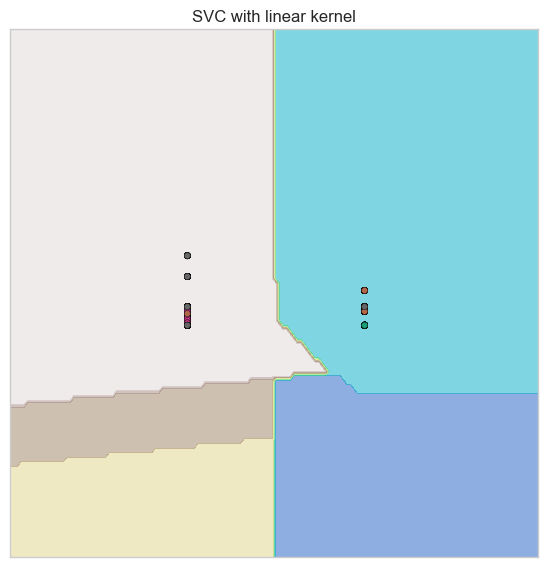

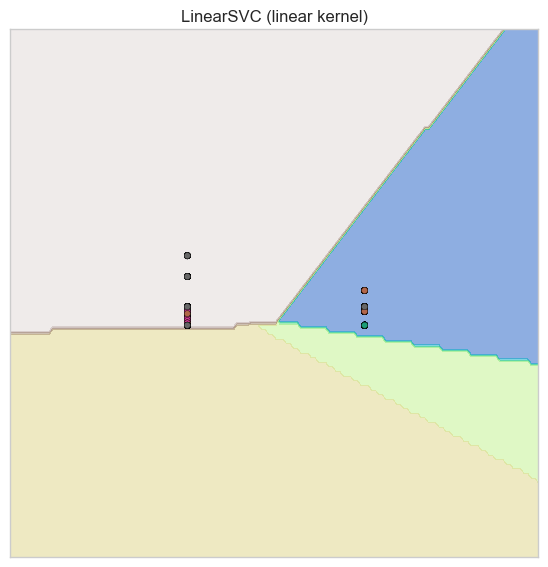

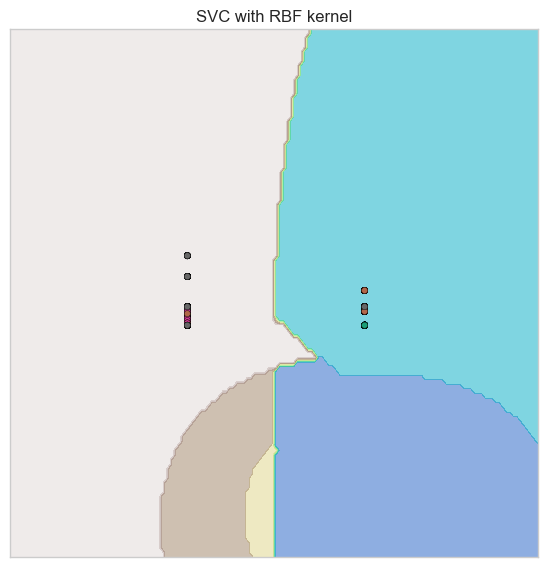

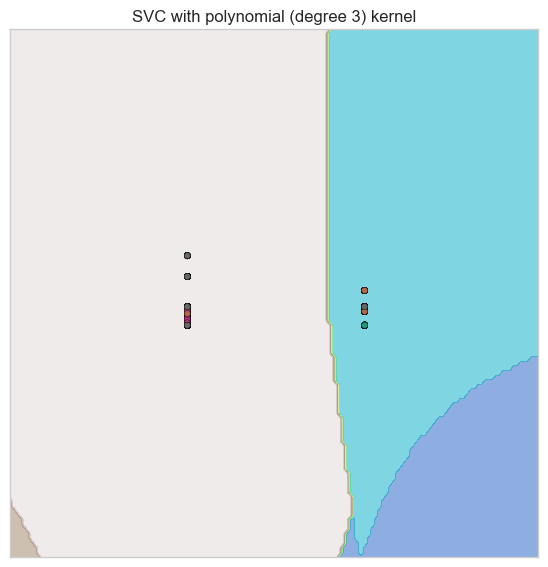

In [96]:
# go through each model, set its position as a subplot, then scatter the data points and a countour of the decision boundaries.

for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    #numpy.c_ is used translates the sliced objects in a concatenation along the second axis.
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    plt.scatter(X.values[:,0],X.values[:,1],c=nyc_target,cmap=plt.cm.Dark2)
    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])    
    

In [97]:
#SVC
model = svm.SVC(kernel='linear',C=C).fit(X_train,Y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(Y_test,predicted))

0.443519549798


In [98]:
#Radial Basis Function
model = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X_train,Y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(Y_test,predicted))

0.876487484612


The Cost and gamma increase the accuracy.

# Conclusion:

    1.How well does the SVM classifier perform?
    SVM classifier provides a accuracy of 82 percent.
    
    2.Try different kernels. How do they effect its performce?
    The SVM RBF provides the provides the highest performace of 91 percent whereas SVC provides 47.
    
    3.What might improve its performce?
     The tuning factor C and gamma plays important role in improving accuracy to 91.
     The size and randomn state place a major factor.
     
    4.Does scaling, normalization or leaving the data unscaled make a difference for SVMs?
    As value doesn't have any spikes, it better to leave them denormalised.